## Using Folium Map to Overlay WMS with 180° wrap for New Zealand

**Folium map** replaced with jpegs for easy viewing in github

In [ ]:
%matplotlib inline
from IPython.display import HTML
import folium
import numpy as np 
from matplotlib import pyplot as plt

In [ ]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 450px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 450px; border: 3"></iframe>'.format(path=path))

Click on legend button to check the given WMS layer.  
Min/max lon (0,360) specified here while defining folium map to see data around Chatham Islands, New Zealand.

In [ ]:
map = folium.Map(width=900,height=450,location=[-41.25, 179], zoom_start=5,min_lon=0, max_lon=360)

map.circle_marker(location=[-42.400, 173.677], popup="KAIKOURA, New Zealand", fill_color='#FF0000',\
                  line_color=None, radius=20000)
map.circle_marker(location=[-44.033, 183.433], popup="Chatham Islands, New Zealand", fill_color='#4AA5FA',\
                  line_color=None, radius=20000)

map.add_wms_layer(wms_name="All NZ Topographic Baselayers",
                 wms_url="http://maps.scinfo.org.nz/basemaps/wms",
                 wms_format="image/png",
                 wms_layers='topobasemap')
map.add_wms_layer(wms_name="GMRT",
                wms_url="http://gmrt.marine-geo.org/cgi-bin/mapserv?map=/public/mgg/web/gmrt.marine-geo.org/htdocs/services/map/wms_merc.map",
                wms_format="image/png",
                wms_layers='topo')
map.add_layers_to_map()
inline_map(map)

### Before  
For example GMRT WMS does not wraps around 180 degrees but here it does seem to work when 'max_lon' is defined to 360.

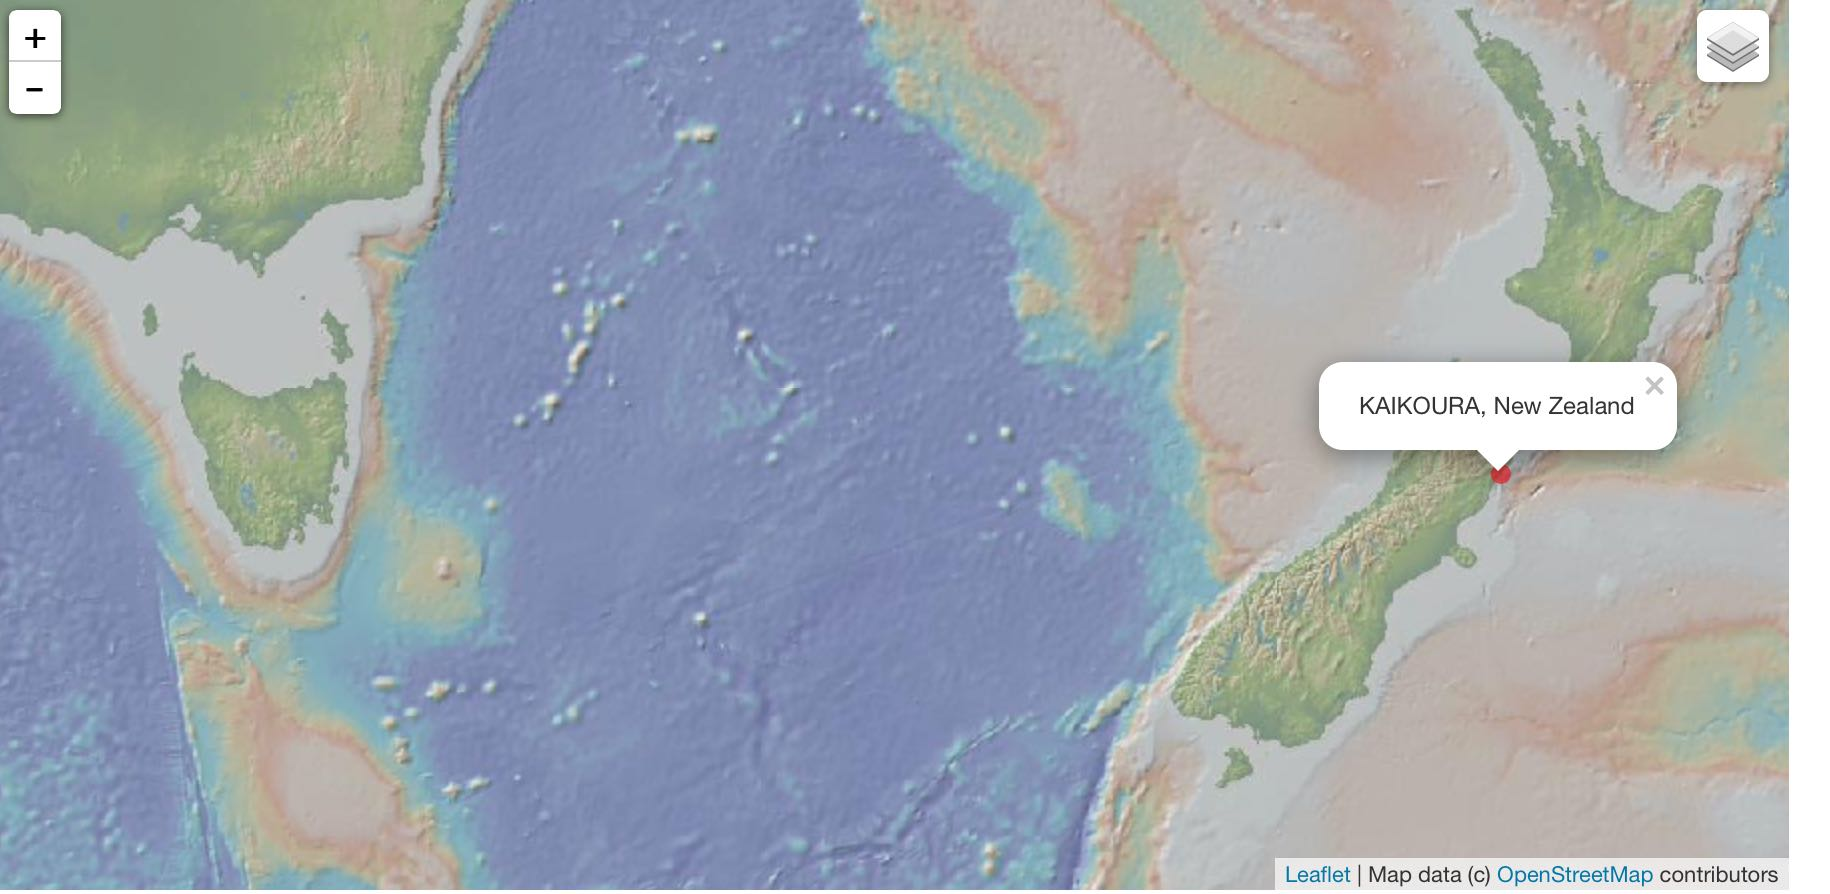

In [20]:
from IPython.display import Image
Image(filename='./180 degree issue.jpg')

### After

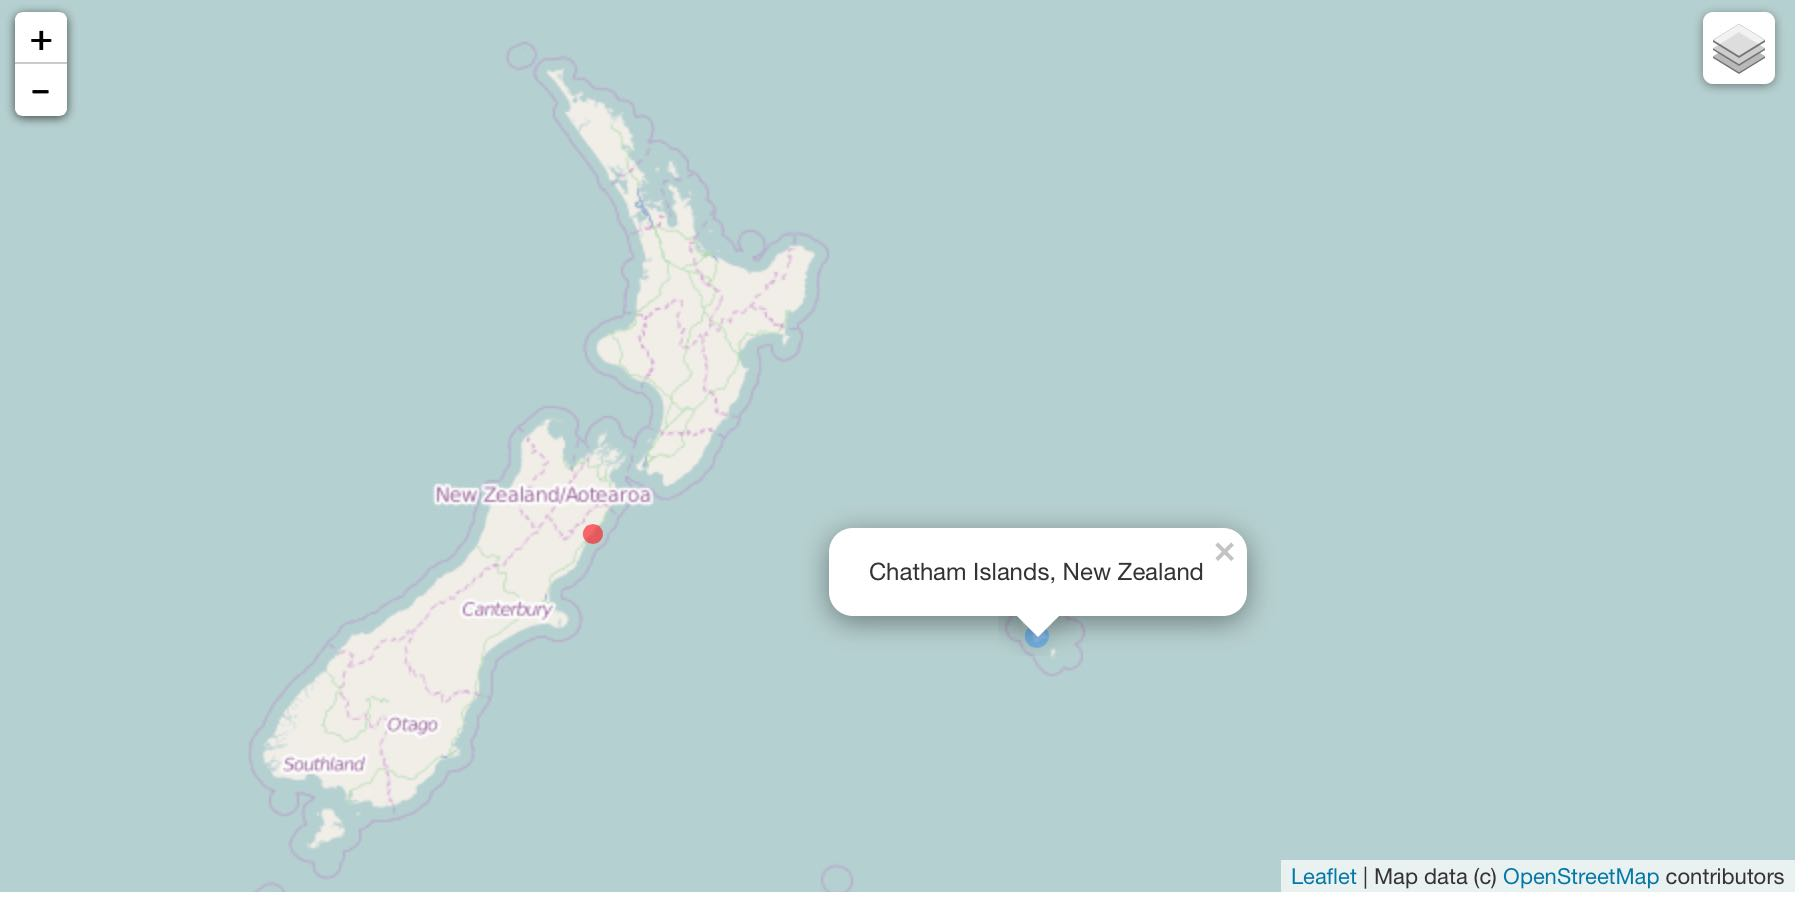

In [22]:
Image(filename='./180 degree wrap.jpg') 

###### Topo Basemap URLs:   
http://maps.scinfo.org.nz/basemaps/wms?LAYERS=urban_grp,copyright&FORMAT=png8&TRANSPARENT=true&VERSION=1.3.0&SERVICE=WMS&REQUEST=GetMap&STYLES=&CRS=EPSG%3A4326&BBOX=-43.61285,172.56394,-43.50447,172.67232&WIDTH=256&HEIGHT=256

https://data.linz.govt.nz/services;key=YOUR_API_TOKEN/wms?service=WMS&version=1.1.1&request=GetCapabilities